<a href="https://colab.research.google.com/github/irwanmaulana42/google-collab/blob/master/Gaussian%20Distribution%20Deep%20Learning%20klasifikasi%20gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Input, GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape images to 28x28x1
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Define input shape
input_shape = x_train[0].shape

# Define model architecture
inputs = Input(shape=input_shape)
x = GaussianNoise(0.1)(inputs)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
batch_size = 32
epochs = 10
history = model.fit(x_train, tf.one_hot(y_train, 10), batch_size=batch_size, epochs=epochs, validation_data=(x_test, tf.one_hot(y_test, 10)))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3044 - accuracy: 0.9096 - val_loss: 0.1569 - val_accuracy: 0.9538
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1464 - accuracy: 0.9565 - val_loss: 0.1235 - val_accuracy: 0.9618
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1109 - accuracy: 0.9658 - val_loss: 0.1163 - val_accuracy: 0.9637
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0923 - accuracy: 0.9715 - val_loss: 0.0976 - val_accuracy: 0.9703
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0818 - accuracy: 0.9744 - val_loss: 0.1033 - val_accuracy: 0.9675
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0719 - accuracy: 0.9772 - val_loss: 0.0825 - val_accuracy: 0.9734
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0635 - accuracy: 0.9794 - val_loss: 0.0827 - val_accurac

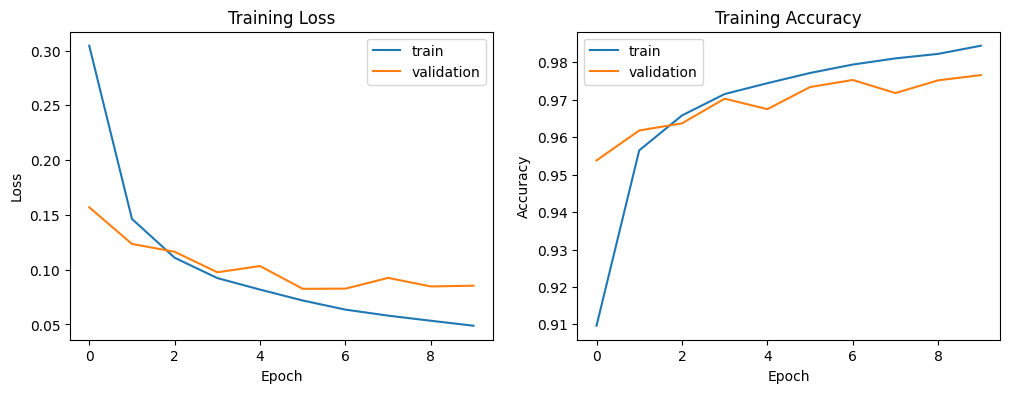

In [7]:
# Plot training history
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='validation')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='train')
ax[1].plot(history.history['val_accuracy'], label='validation')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Training Accuracy')
ax[1].legend()

plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9766


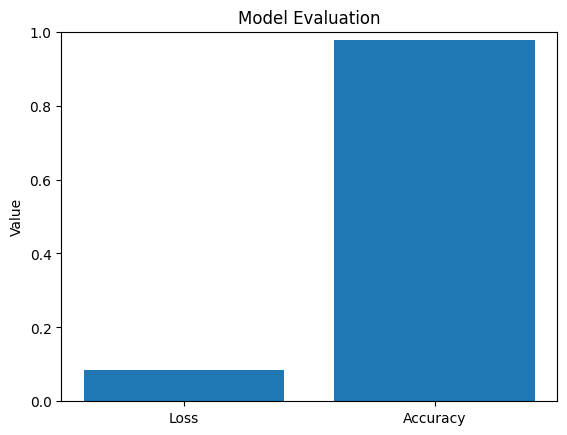

In [8]:
# Evaluate model
loss, accuracy = model.evaluate(x_test, tf.one_hot(y_test, 10))

# Plot loss and accuracy
fig, ax = plt.subplots()
ax.bar(['Loss', 'Accuracy'], [loss, accuracy])
ax.set_ylim([0, 1])
ax.set_ylabel('Value')
ax.set_title('Model Evaluation')
plt.show()